In [1]:
%matplotlib inline
import skimage
import skimage.feature
import skimage.io
import matplotlib.pyplot as plt
import numpy

# 画像データを読み込み、グレースケールに変換

In [2]:
data = skimage.io.imread("../VirtualDatasets/Level1/01_01_0065.jpg")
data2 = skimage.color.rgb2gray(data)
data2

array([[ 0.51087373,  0.00421922,  0.62149176, ...,  0.98586275,
         0.98586275,  0.98586275],
       [ 0.51559373,  0.61603647,  0.64697765, ...,  0.98586275,
         0.98586275,  0.98586275],
       [ 0.01166667,  0.6440102 ,  0.61140157, ...,  0.98586275,
         0.98586275,  0.98586275],
       ..., 
       [ 0.82208549,  0.81366902,  0.79911373, ...,  0.72655255,
         0.75485961,  0.78203569],
       [ 0.81985333,  0.81816392,  0.81480784, ...,  0.70386353,
         0.72319647,  0.74337765],
       [ 0.81032863,  0.80808863,  0.81424235, ...,  0.70022471,
         0.70610353,  0.71478784]])

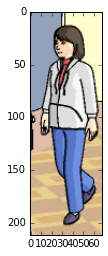

In [3]:
plt.imshow(data)

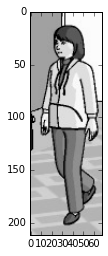

In [4]:
plt.imshow(data2, cmap='gray')

In [5]:
edges1 = skimage.feature.canny(data2)

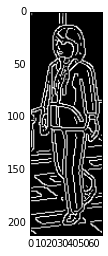

In [6]:
plt.imshow(edges1, cmap='gray')

In [7]:
edges1

array([[False, False, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], dtype=bool)

In [8]:
edges2 = numpy.zeros(edges1.shape, dtype=bool)
edges2.shape

(212, 68)

In [9]:
for y in range(edges2.shape[0]):
    flag = False
    lastX = 0
    for x in range(edges2.shape[1]):
        if ( edges1[y,x] == True ):
            lastX = x
        edges2[y,x] = False
    #print(y,lastX)
    for x in range(lastX):
        if ( edges1[y,x] ):
            flag = True
        edges2[y,x] = flag

In [10]:
edges2

array([[False, False, False, ..., False, False, False],
       [False,  True,  True, ..., False, False, False],
       [False,  True,  True, ..., False, False, False],
       ..., 
       [False, False, False, ...,  True, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], dtype=bool)

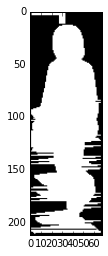

In [11]:
plt.imshow(edges2, cmap='gray')

# マスク完成？

In [12]:
data3 = numpy.zeros(data.shape, dtype=data.dtype)
data3.shape

(212, 68, 3)

In [13]:
data3 = numpy.zeros(data.shape, dtype=data.dtype)
for y in range(data3.shape[0]):
    for x in range(data3.shape[1]):
        data3[y,x,0] = data[y,x,0] * edges2[y,x]
        data3[y,x,1] = data[y,x,1] * edges2[y,x]
        data3[y,x,2] = data[y,x,2] * edges2[y,x]

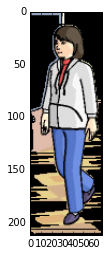

In [14]:
plt.imshow(data3)